# Q1

## 🏷️ Installing YOLOv12 and Downloading an Image for Inference

In [1]:
!pip install ultralytics --quiet
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git supervision --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml)

In [2]:
import requests

# Image URL
url = "https://th.bing.com/th/id/OIP.DMssExlbB6NX9sWjkjIEFwHaE7?cb=iwc2&rs=1&pid=ImgDetMain"

# Send a GET request to the image URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the image to disk
    with open("downloaded_image.jpg", "wb") as f:
        f.write(response.content)
    print("✅ Image downloaded successfully as 'downloaded_image.jpg'")
else:
    print("❌ Failed to download image. Status code:", response.status_code)


✅ Image downloaded successfully as 'downloaded_image.jpg'


## ✅ Understanding the Terminology

### **🕒 Run Time vs Inference Time**

| Metric             | Description                                                                                                                                                                  |
| ------------------ | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Run Time**       | Total time taken to load the model, preprocess the image, perform inference, and postprocess results (everything from start to finish).                                      |
| **Inference Time** | Time taken **only for the model forward pass** (i.e., when the model performs prediction on the input tensor). This excludes model loading and preprocessing/postprocessing. |

## 🏷️ YOLOv12 Inference with Timing Metrics in Python

In [11]:
import time
import torch
from PIL import Image
from pathlib import Path
from ultralytics import YOLO  # Assuming YOLOv12 support is within this

# Define image path
IMAGE_PATH = '/content/downloaded_image.jpg'

# Function to run detection and measure times
def detect_and_time(model_name, image_path):
    print(f"\n🔍 Running detection with {model_name}...")

    # -------- Total Run Time Starts --------
    run_start = time.time()

    # Load model
    model = YOLO(model_name)  # e.g., 'yolov12s.pt' or 'yolov12l.pt'

    # Load and preprocess image
    img = Image.open(image_path)

    # -------- Inference Time Starts --------
    infer_start = time.time()

    # Run detection
    results = model(img)

    # -------- Inference Time Ends --------
    infer_end = time.time()

    # Postprocessing is typically inside YOLO results already
    run_end = time.time()

    # Compute times
    inference_time = infer_end - infer_start
    run_time = run_end - run_start

    print(f"📍 Inference Time for {model_name}: {inference_time:.4f} seconds")
    print(f"⏱️ Total Run Time for {model_name}: {run_time:.4f} seconds")
    return results


🔍 Running detection with yolov12s.pt...

0: 448x640 4 persons, 12 cars, 2 buss, 16.5ms
Speed: 1.9ms preprocess, 16.5ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
📍 Inference Time for yolov12s.pt: 0.2658 seconds
⏱️ Total Run Time for yolov12s.pt: 0.3402 seconds

🔍 Running detection with yolov12l.pt...

0: 448x640 5 persons, 12 cars, 2 buss, 45.2ms
Speed: 1.9ms preprocess, 45.2ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
📍 Inference Time for yolov12l.pt: 0.6349 seconds
⏱️ Total Run Time for yolov12l.pt: 0.8024 seconds


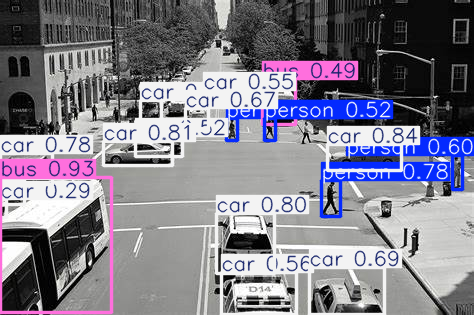

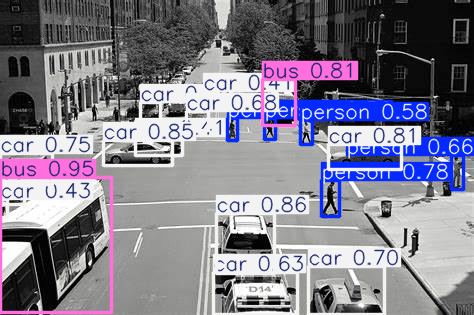

In [10]:
# Run detection for YOLOv12-small and YOLOv12-large
results_small = detect_and_time('yolov12s.pt', IMAGE_PATH)
results_large = detect_and_time('yolov12l.pt', IMAGE_PATH)

# Optionally show or save results
results_small[0].show()  # visualize
results_large[0].show()  # visualize
# results_small[0].save(filename="result_small.jpg")
# results_large[0].save(filename="result_large.jpg")


| Feature                            | `results[0].show()` (Ultralytics) | `supervision` Library                                |
| ---------------------------------- | --------------------------------- | ---------------------------------------------------- |
| **Customization**                  | Minimal (default style)           | High (box style, labels, color per class, font size) |
| **Label Styling**                  | Default font & style              | Fully customizable                                   |
| **Filtering (NMS or class-based)** | Handled internally (some control) | Explicit via `.with_nms()` and custom logic          |
| **Composability / Extensibility**  | Less flexible                     | Easy to chain and extend with custom annotations     |
| **Integration with NumPy**         | Limited                           | Full (works directly with NumPy/OpenCV pipelines)    |
| **Use Cases**                      | Quick visualization               | Production-ready visualization & post-processing     |


## Comparing YOLOv12-Small and YOLOv12-Large using Supervision Annotations

In [12]:
import supervision as sv
import numpy as np


🔍 Running detection with yolov12s.pt...

0: 448x640 4 persons, 12 cars, 2 buss, 21.1ms
Speed: 2.4ms preprocess, 21.1ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
📍 Inference Time for yolov12s.pt: 0.2988 seconds
⏱️ Total Run Time for yolov12s.pt: 0.6648 seconds

🔍 Running detection with yolov12l.pt...

0: 448x640 5 persons, 12 cars, 2 buss, 47.8ms
Speed: 2.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
📍 Inference Time for yolov12l.pt: 0.6072 seconds
⏱️ Total Run Time for yolov12l.pt: 0.7695 seconds


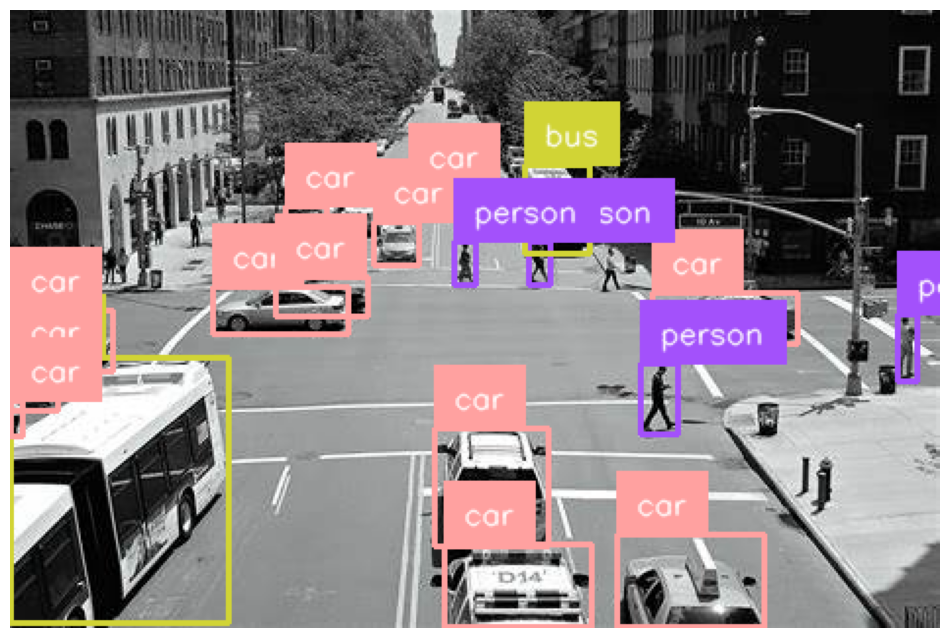

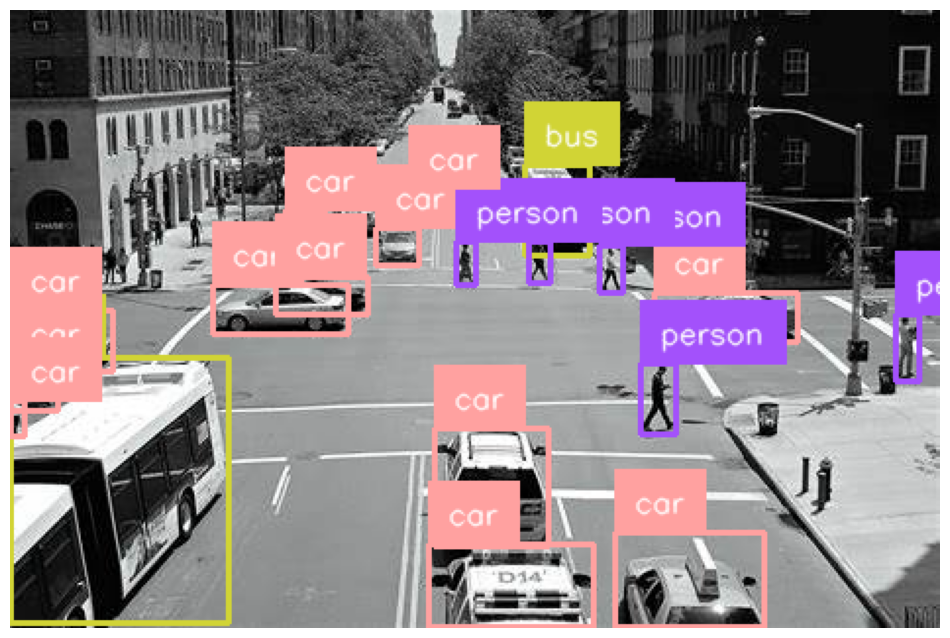

In [13]:
# Run detection for YOLOv12-small and YOLOv12-large
results_small = detect_and_time('yolov12s.pt', IMAGE_PATH)
results_large = detect_and_time('yolov12l.pt', IMAGE_PATH)

# Convert PIL image to NumPy array for supervision annotation
original_image = np.array(Image.open(IMAGE_PATH))

# Create annotators (customize parameters as needed)
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# Process and visualize YOLOv12-small results
detections_small = sv.Detections.from_ultralytics(results_small[0]).with_nms()
annotated_small = box_annotator.annotate(scene=original_image.copy(), detections=detections_small)
annotated_small = label_annotator.annotate(scene=annotated_small, detections=detections_small)
sv.plot_image(annotated_small)

# Process and visualize YOLOv12-large results
detections_large = sv.Detections.from_ultralytics(results_large[0]).with_nms()
annotated_large = box_annotator.annotate(scene=original_image.copy(), detections=detections_large)
annotated_large = label_annotator.annotate(scene=annotated_large, detections=detections_large)
sv.plot_image(annotated_large)


### ✅ The Two Different Timing Reports


---

#### **1. YOLOv12 Internal Timing (`Speed: ...` line)**

This is printed by **Ultralytics YOLO** internally and refers to **per-image processing time** within the model:

| Metric        | What it means                                           |
| ------------- | ------------------------------------------------------- |
| `preprocess`  | Time to resize, normalize, convert image to tensor      |
| `inference`   | Time taken by the model’s forward pass (`model()` call) |
| `postprocess` | Non-Max Suppression (NMS), thresholding, etc.           |
| **Unit**      | **Milliseconds per image**                              |

This is **low-level, per-image measurement** and **does not include Python overhead**, model loading, or I/O delays.

---

#### **2. `detect_and_time` function**

| Metric           | What it means                                                                            |
| ---------------- | ---------------------------------------------------------------------------------------- |
| `Inference Time` | Time measured between `infer_start` and `infer_end` → full time of `model(img)`          |
| `Run Time`       | Time from model loading to end of detection (includes model load + PIL image open, etc.) |
| **Unit**         | **Seconds** (so `0.2775s = 277.5ms`)                                                     |

This measures **end-to-end inference time**, including:

* Conversion from PIL to NumPy (or internal tensor),
* All Python overhead,
* GPU synchronization delays,
* And even async-to-sync calls that torch might implicitly block.

---

### 🧠 Why the difference?

Because `model(img)` triggers multiple operations that involve Python overhead and potentially CUDA synchronization, measured time in mentioned function is always going to be **slower** than the internal model-reported numbers.


## Analyzing the Results

| Model         | Inference Time (s) | Run Time (s)  |
| ------------- | ------------------ | ------------- |
| YOLOv12-small | 0.2988    | 0.6648 |
| YOLOv12-large | 0.6072    | 0.7695 |

---

## 🎓 Why the Difference?

### 🔹 YOLOv12-small

* **Smaller model size** (fewer parameters, layers).
* Faster load and faster inference.
* Designed for **edge devices and real-time** use cases.

### 🔹 YOLOv12-large

* **More parameters** (deeper network, wider channels).
* More accurate but computationally intensive.
* Slower model loading and forward pass.

---

## 📌 Summary

* **Inference Time** is mainly affected by model architecture.
* **Run Time** includes extra steps like loading weights, preprocessing image, postprocessing outputs.
* For real-time applications (e.g., on edge devices), **YOLOv12-small** is preferred.
* For accuracy-critical offline batch processing, **YOLOv12-large** is better.


# Q2- Person Detection in an Image Using YOLOv12-medium and Python

## Option-1

100%|██████████| 38.0M/38.0M [00:00<00:00, 40.1MB/s]



0: 448x640 5 persons, 12 cars, 3 buss, 46.6ms
Speed: 3.2ms preprocess, 46.6ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)


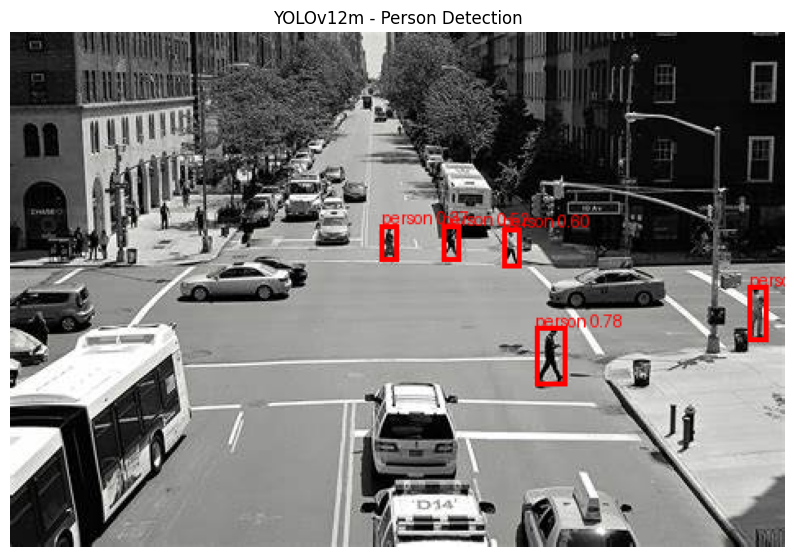

In [14]:
from ultralytics import YOLO
from PIL import Image, ImageDraw
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Load image from URL
url = "https://th.bing.com/th/id/OIP.DMssExlbB6NX9sWjkjIEFwHaE7?cb=iwc2&rs=1&pid=ImgDetMain"
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert("RGB")

# Load YOLOv12-medium model
model = YOLO("yolov12m.pt")

# Run inference
results = model(image)[0]  # Only need the first result

# Filter only 'person' class (class_id == 0 for COCO)
person_detections = [det for det in results.boxes.data if int(det[-1]) == 0]

# Visualize only person boxes
annotated_img = image.copy()
draw = ImageDraw.Draw(annotated_img)

for det in person_detections:
    x1, y1, x2, y2, conf, cls = det.tolist()
    draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
    draw.text((x1, y1 - 10), f"person {conf:.2f}", fill="red")

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(annotated_img)
plt.axis("off")
plt.title("YOLOv12m - Person Detection")
plt.show()

## Option-2- Filtering and Annotating YOLOv12 Detections for Person Class Using Supervision

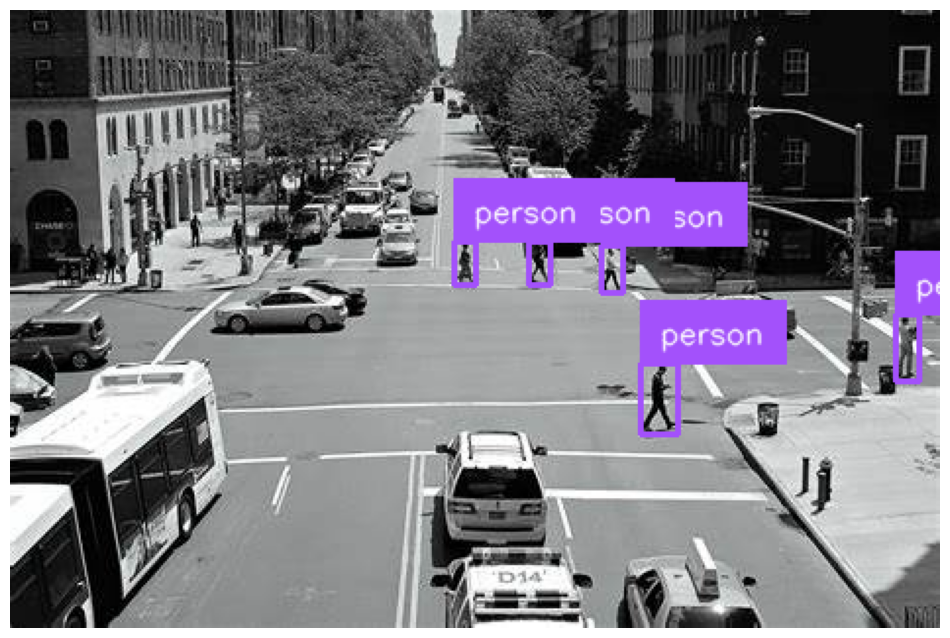

In [15]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
from ultralytics import YOLO
import supervision as sv

# Step 1: Load image from URL
IMAGE_URL = "https://th.bing.com/th/id/OIP.DMssExlbB6NX9sWjkjIEFwHaE7?cb=iwc2&rs=1&pid=ImgDetMain"
response = requests.get(IMAGE_URL)
image = Image.open(BytesIO(response.content)).convert("RGB")
image_np = np.array(image)

# Step 2: Load YOLOv12-medium model
model = YOLO("yolov12m.pt")  # Assumes this model is available locally or cached

# Step 3: Run detection
results = model(image, verbose=False)[0]

# Step 4: Extract detections and filter only 'person'
detections = sv.Detections.from_ultralytics(results).with_nms()

# Get class names from the model
class_names = model.model.names

# Step 5: Filter for 'person' class
person_class_id = [k for k, v in class_names.items() if v == 'person']
detections = detections[detections.class_id == person_class_id[0]]

# Step 6: Annotate with supervision
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image_np.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# Step 7: Display annotated image
sv.plot_image(annotated_image)
